# **Sponsorship Statistics Across YouTube Channels**
### *Powered by the SponsorBlock API, created by Ajay Ramachandran*

In [20]:
import pytube
import importlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

# Local
import general
import plotting
import video_stats
import channel_stats

## Data Collection

In [21]:
import sponsorblock as sb

c = pytube.Channel("https://www.youtube.com/c/LinusTechTips")
video_urls = c.video_urls

data = general.get_rawdata(urls = video_urls[0:100], update = False)

https://www.youtube.com/watch?v=SYc922ntnKM Server Error: 502 Bad Gateway
https://www.youtube.com/watch?v=NWsMzSe5gLw Server Error: 502 Bad Gateway


## Data Cleaning

### Reorganize based on video

```
Format: [video_id, title, length, description, keywords, 
    publish_date, views, segment_selfpromo, segment_sponsor, ...]
segment_xyz = [ #List to hold all of a single type of segment present in a video
    {
        "start": 1.523,
        "end": 2.311,
        "duration": 0.788
    },
    {
        ...
    }, ...
]
```

In [23]:
data_df = pd.DataFrame(data)
data_df = data_df.drop(columns=["data","uuid","action_type"])
data_df = data_df[["video_id"] + list(data_df.columns.values)[:-1]]

pytube_attributes = ["title","length","description","keywords","publish_date","views"]
segment_categories = sb.utils.ALL_CATEGORIES
temp_data = []

for video_id in data_df["video_id"].unique().tolist():
    
    entry = [video_id]
    sub_df = data_df.loc[data_df["video_id"] == video_id]

    # It takes time for pytube to query all the video metadata,
    # so this pytube_attribute loop takes a while to run.
    for attribute in pytube_attributes:
        entry.append(getattr(sub_df.iloc[0]["youtube_object"], attribute))
    
    for category in segment_categories:

        category_df = sub_df.loc[data_df["category"] == category]
        temp_segment_category = []

        for key,val in enumerate([category_df.iloc[i] for i in range(len(category_df))]):
            
            temp_dict = {
                "start": val["start"],
                "end": val["end"],
                "duration": round(val["end"]-val["start"],3)
            }
            temp_segment_category.append(temp_dict)
        
        # Fill with 'empty' segments, avoid holes in dataset
        if category_df.empty:
            temp_segment_category = [
                {
                    "start": 0.0,
                    "end": 0.0,
                    "duration": 0.0
                }
            ]

        entry.append(temp_segment_category)

    temp_data.append(entry)

data_df = pd.DataFrame(temp_data,columns = ["video_id"] + pytube_attributes + segment_categories)



KeyboardInterrupt: 

In [ ]:
display(data_df)

,video_id,title,length,description,keywords,publish_date,views,sponsor,selfpromo,interaction,intro,outro,preview,music_offtopic,poi_highlight,filler
0,4V_pYA7Uq0U,I LOVE Paywalls. Thanks Intel! - ECC Support o...,767,Check out Jackery’s Solar Generator 1000 Pro a...,"[ECC, Memory, Error Correction Code, Intel, 12...",2022-09-25,1312375,"[{'start': 71.283, 'end': 85.136, 'duration': ...","[{'start': 237.766, 'end': 253.465, 'duration'...","[{'start': 0.0, 'end': 0.0, 'duration': 0.0}]","[{'start': 0.0, 'end': 0.0, 'duration': 0.0}]","[{'start': 759.347, 'end': 767.201, 'duration'...","[{'start': 0.0, 'end': 0.0, 'duration': 0.0}]","[{'start': 0.0, 'end': 0.0, 'duration': 0.0}]","[{'start': 0.0, 'end': 0.0, 'duration': 0.0}]","[{'start': 396.114, 'end': 398.615, 'duration'..."
1,8dEIy1YXJ4A,My wife vetoed my plan,1580,Thanks to Govee for sponsoring today's video! ...,[],2022-09-24,1600584,"[{'start': 33.875, 'end': 36.201, 'duration': ...","[{'start': 115.275, 'end': 122.901, 'duration'...","[{'start': 0.0, 'end': 0.0, 'duration': 0.0}]","[{'start': 51.726, 'end': 61.036, 'duration': ...","[{'start': 1562.578, 'end': 1579.481, 'duratio...","[{'start': 0.0, 'end': 0.0, 'duration': 0.0}]","[{'start': 0.0, 'end': 0.0, 'duration': 0.0}]","[{'start': 0.0, 'end': 0.0, 'duration': 0.0}]","[{'start': 317.316, 'end': 328.684, 'duration'..."
2,7YuiFlhe8j4,NVIDIA Thinks You're RICH - WAN Show September...,9503,Discover more about Shadow's Business Solution...,"[pcmr, building, competition, gamers, how to, ...",2022-09-23,727684,"[{'start': 132.198, 'end': 140.638, 'duration'...","[{'start': 149.722, 'end': 153.852, 'duration'...","[{'start': 0.0, 'end': 0.0, 'duration': 0.0}]","[{'start': 112.564, 'end': 132.298, 'duration'...","[{'start': 9483.665, 'end': 9502.655, 'duratio...","[{'start': 7.547, 'end': 112.931, 'duration': ...","[{'start': 0.0, 'end': 0.0, 'duration': 0.0}]","[{'start': 140.637, 'end': 140.637, 'duration'...","[{'start': 0.0, 'end': 3.695, 'duration': 3.69..."
3,3CDOSj8fZA4,Everyone said this was impossible,1754,"Try FreshBooks free, for 30 days, no credit ca...","[100 gigabit, datacenter networking, networkin...",2022-09-22,1660300,"[{'start': 66.837, 'end': 85.21, 'duration': 1...","[{'start': 19.77, 'end': 21.547, 'duration': 1...","[{'start': 0.0, 'end': 0.0, 'duration': 0.0}]","[{'start': 85.06, 'end': 94.148, 'duration': 9...","[{'start': 1739.676, 'end': 1753.981, 'duratio...","[{'start': 0.0, 'end': 0.0, 'duration': 0.0}]","[{'start': 0.0, 'end': 0.0, 'duration': 0.0}]","[{'start': 0.0, 'end': 0.0, 'duration': 0.0}]","[{'start': 0.0, 'end': 7.794, 'duration': 7.79..."
4,cQbp64JRkdA,This 2300ft cable saved us THOUSANDS of dollar...,59,"The new new lab isn't that far, so why not use...","[ethernet, internet, gigabit, download, upload]",2022-09-21,754315,"[{'start': 0.0, 'end': 0.0, 'duration': 0.0}]","[{'start': 0.0, 'end': 0.0, 'duration': 0.0}]","[{'start': 0.0, 'end': 0.0, 'duration': 0.0}]","[{'start': 0.0, 'end': 0.0, 'duration': 0.0}]","[{'start': 0.0, 'end': 0.0, 'duration': 0.0}]","[{'start': 0.0, 'end': 0.0, 'duration': 0.0}]","[{'start': 0.0, 'end': 0.0, 'duration': 0.0}]","[{'start': 0.0, 'end': 0.0, 'duration': 0.0}]","[{'start': 0.0, 'end': 0.0, 'duration': 0.0}]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,_vLq2PjmIx0,AMD is in TROUBLE – Ryzen 7000 Full Review,888,Learn more about NexiGo's family of webcams he...,"[amd, rizen, ryzen, ryzne, amd ryzen 700, inte...",2022-09-26,1624475,"[{'start': 54.965, 'end': 74.873, 'duration': ...","[{'start': 442.299, 'end': 449.493, 'duration'...","[{'start': 0.0, 'end': 0.0, 'duration': 0.0}]","[{'start': 74.558, 'end': 83.907, 'duration': ...","[{'start': 873.343, 'end': 887.621, 'duration'...","[{'start': 0.0, 'end': 0.0, 'duration': 0.0}]","[{'start': 0.0, 'end': 0.0, 'duration': 0.0}]","[{'start': 0.0, 'end': 0.0, 'duration': 0.0}]","[{'start': 0.0, 'end': 9.041, 'duration': 9.041}]"
97,lbjWRvzL-o0,"Intel Takes The L - WAN Show Augu

### **Brief Visualization Detour**
- ### Total Segment Duration (in seconds) versus Publish Date

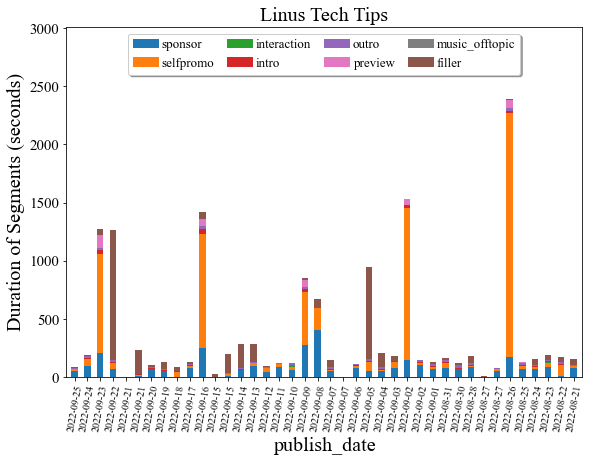

In [ ]:
%matplotlib inline

importlib.reload(plotting)
plotting.make_channel_plot(data_df, x_axis="publish_date", plot_type="StackedSegBar",
    exclude=["poi_highlight"], method="segment_dur", title="Linus Tech Tips")

- ### Interactive version

    - Click on any of the bars to open up the YouTube video they correspond to

Try clicking directly on the features within the plot


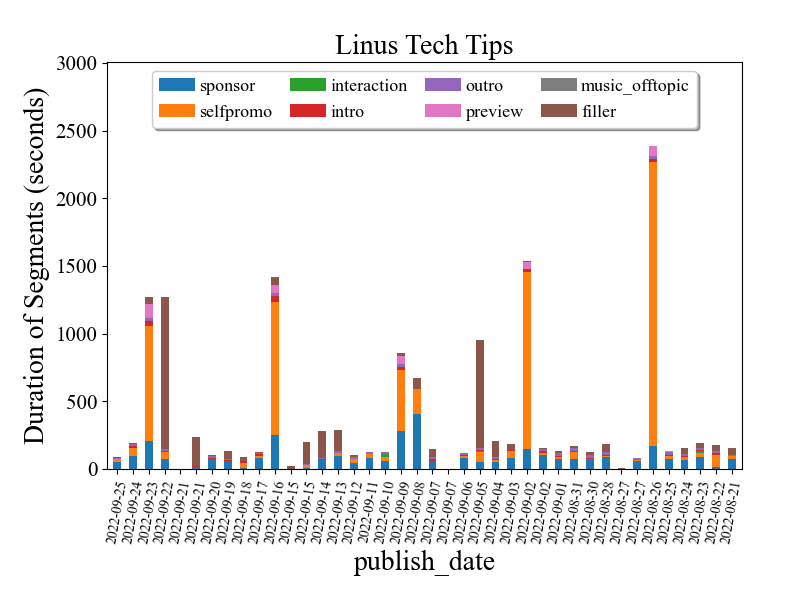

In [ ]:
%matplotlib widget

# There is some bug between matplotlib and
# Jupyter notebooks and I haven't had time 
# to figure out which one is at fault.

# If this doesn't display correctly try 
# running all the cells in the notebook
# or running this one a few times. 

importlib.reload(plotting)
print("Try clicking directly on the features within the plot")
plotting.make_channel_plot(data_df, x_axis="publish_date", plot_type="StackedSegBar",
    exclude=["poi_highlight"], method="segment_dur", title="Linus Tech Tips",tight_layout_padding=4)

## Data Processing

- Process each video entry to further quantify their properties
- Tabulate stuff like title length, total segment duration, ect

In [ ]:
importlib.reload(video_stats)
categories = general.get_categories(exclude=["poi_highlight"])
processed_data_df = data_df.apply(video_stats.calculate_all_stats, axis=1, args=([categories]))

In [ ]:
display(processed_data_df)

,video_id,title,length,description,keywords,publish_date,views,sponsor,selfpromo,interaction,...,music_offtopic_total_dur,filler_total_dur,sponsor_total_num,selfpromo_total_num,interaction_total_num,intro_total_num,outro_total_num,preview_total_num,music_offtopic_total_num,filler_total_num
0,4V_pYA7Uq0U,I LOVE Paywalls. Thanks Intel! - ECC Support o...,767,Check out Jackery’s Solar Generator 1000 Pro a...,"[ECC, Memory, Error Correction Code, Intel, 12...",2022-09-25,1312375,"[{'start': 71.283, 'end': 85.136, 'duration': ...","[{'start': 237.766, 'end': 253.465, 'duration'...","[{'start': 0.0, 'end': 0.0, 'duration': 0.0}]",...,0.0,2.501,2,2,0,0,1,0,0,1
1,8dEIy1YXJ4A,My wife vetoed my plan,1580,Thanks to Govee for sponsoring today's video! ...,[],2022-09-24,1600584,"[{'start': 33.875, 'end': 36.201, 'duration': ...","[{'start': 115.275, 'end': 122.901, 'duration'...","[{'start': 0.0, 'end': 0.0, 'duration': 0.0}]",...,0.0,11.368,7,6,0,1,1,0,0,1
2,7YuiFlhe8j4,NVIDIA Thinks You're RICH - WAN Show September...,9503,Discover more about Shadow's Business Solution...,"[pcmr, building, competition, gamers, how to, ...",2022-09-23,727684,"[{'start': 132.198, 'end': 140.638, 'duration'...","[{'start': 149.722, 'end': 153.852, 'duration'...","[{'start': 0.0, 'end': 0.0, 'duration': 0.0}]",...,0.0,54.164,3,17,0,2,1,1,0,2
3,3CDOSj8fZA4,Everyone said this was impossible,1754,"Try FreshBooks free, for 30 days, no credit ca...","[100 gigabit, datacenter networking, networkin...",2022-09-22,1660300,"[{'start': 66.837, 'end': 85.21, 'duration': 1...","[{'start': 19.77, 'end': 21.547, 'duration': 1...","[{'start': 0.0, 'end': 0.0, 'duration': 0.0}]",...,0.0,1120.801,3,5,0,1,1,0,0,20
4,cQbp64JRkdA,This 2300ft cable saved us THOUSANDS of dollar...,59,"The new new lab isn't that far, so why not use...","[ethernet, internet, gigabit, download, upload]",2022-09-21,754315,"[{'start': 0.0, 'end': 0.0, 'duration': 0.0}]","[{'start': 0.0, 'end': 0.0, 'duration': 0.0}]","[{'start': 0.0, 'end': 0.0, 'duration': 0.0}]",...,0.0,0.000,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,_vLq2PjmIx0,AMD is in TROUBLE – Ryzen 7000 Full Review,888,Learn more about NexiGo's family of webcams he...,"[amd, rizen, ryzen, ryzne, amd ryzen 700, inte...",2022-09-26,1624475,"[{'start': 54.965, 'end': 74.873, 'duration': ...","[{'start': 442.299, 'end': 449.493, 'duration'...","[{'start': 0.0, 'end': 0.0, 'duration': 0.0}]",...,0.0,9.041,2,2,0,1,1,0,0,1
97,lbjWRvzL-o0,"Intel Takes The L - WAN Show August 5, 2022",8554,Get a free 5 day trial and an additional 20% o...,"[pcmr, building, competition, gamers, how to, ...",2022-08-05,580277,"[{'start': 94.853, 'end': 105.677, 'duration':...","[{'start': 902.482, 'end': 1322.781, 'duration...","[{'start': 0.0, 'end': 0.0, 'duration': 0.0}]",...,0.0,33.902,3,9,0,1,1,1,0,3
98,4wSbetpgJHo,Why does this Fan cost $900? #SHORTS #pcbuilding,60,Would you spend $900 on a single fan? For some...,"[piezoelectric, fan, space tech, cooling, pc c...",2022-08-04,2102143,"[{'start': 0.0, 'end': 0.0, 'duration': 0.0}]","[{'start': 0.0, 'end': 0.0, 'duration': 0.0}]","[{'start': 0.0, 'end': 0.0, 'duration': 0.0}]",...,0.0,0.000,0,0,0,0,0,0,0,0
99,H3lwNOb8iRE,This Laptop changes everything! #SHORTS #lapto...,45,The Framework Laptop flips the entire industry...,"[framework laptop, framework, upgradable lapto...",2022-07-30,3169570,"[{'start': 0.0, 'end': 0.0, 'duration': 0.0}]","[{'start': 0.0, 'end': 0.0, 'duration': 0.0}]","[{'start': 0.0, 'end': 0.0, 'duration': 0.0}]",...,0.0,0.971,0,0,0,0,0,0,0,1


# Analysis and Exploration of Data

### Content Percentage

- Compared to the earlier plots this gives normalized representation, making it easier to compare video to video
- See how including different categories changes the overall percentage of what is considered 'actual content'
    - Calculated in terms of total segment time across all checked (❎) categories divided by total video time

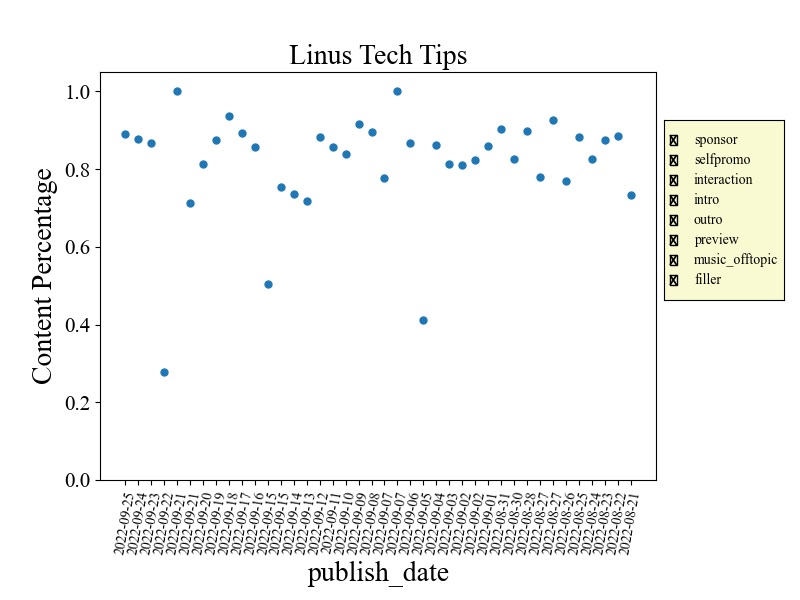

In [ ]:
importlib.reload(plotting)
%matplotlib widget

# If plot is too large or small, try changing the figure dots per inch (dpi)
plt.rcParams['figure.dpi'] = 100

plotting.make_channel_plot(processed_data_df, x_axis="publish_date", plot_type="ScatterContentPercentage",
    exclude=["poi_highlight"], method="segment_dur", title="Linus Tech Tips", video_num_max=40)

In [ ]:
processed_data_df.columns

Index(['video_id', 'title', 'length', 'description', 'keywords',
       'publish_date', 'views', 'sponsor', 'selfpromo', 'interaction', 'intro',
       'outro', 'preview', 'music_offtopic', 'poi_highlight', 'filler',
       'title_length_words', 'title_length_characters',
       'title_capital_concentration', 'description_length_words',
       'description_length_characters', 'description_length_lines',
       'description_links', 'keyword_length_words',
       'keyword_length_characters', 'sponsor_total_dur', 'selfpromo_total_dur',
       'interaction_total_dur', 'intro_total_dur', 'outro_total_dur',
       'preview_total_dur', 'music_offtopic_total_dur', 'filler_total_dur',
       'sponsor_total_num', 'selfpromo_total_num', 'interaction_total_num',
       'intro_total_num', 'outro_total_num', 'preview_total_num',
       'music_offtopic_total_num', 'filler_total_num'],
      dtype='object')

In [ ]:
processed_data_df.describe()

,length,views,title_length_words,title_length_characters,title_capital_concentration,description_length_words,description_length_characters,description_length_lines,description_links,keyword_length_words,...,music_offtopic_total_dur,filler_total_dur,sponsor_total_num,selfpromo_total_num,interaction_total_num,intro_total_num,outro_total_num,preview_total_num,music_offtopic_total_num,filler_total_num
count,101.000000,1.010000e+02,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,...,101.0,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.0,101.000000
mean,1856.930693,1.666854e+06,8.544554,46.564356,8.851485,231.613861,2031.336634,50.118812,16.782178,9.762376,...,0.0,83.961149,2.039604,3.099010,0.089109,0.623762,0.782178,0.168317,0.0,6.178218
std,2629.378121,8.742076e+05,2.471942,13.012621,3.835065,114.004734,818.606319,20.135187,8.156720,5.725641,...,0.0,161.192084,1.611960,4.075549,0.319343,0.614027,0.460521,0.448761,0.0,9.741043
min,22.000000,5.398480e+05,3.000000,14.000000,1.000000,14.000000,71.000000,1.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,630.000000,1.139436e+06,7.000000,34.000000,6.000000,207.000000,2010.000000,49.000000,8.000000,7.000000,...,0.0,2.599000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.000000
50%,1011.000000,1.497888e+06,9.000000,50.000000,9.000000,241.000000,2234.000000,56.000000,19.000000,11.000000,...,0.0,33.120000,2.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.0,3.000000
75%,1515.000000,2.018003e+06,10.000000,57.000000,11.000000,268.000000,2448.000000,62.000000,22.000000,12.000000,...,0.0,84.514000,2.000000,3.000000,0.000000,1.000000,1.000000,0.000000,0.0,8.000000
max,10348.000000,5.345727e+06,14.000000,73.000000,21.000000,577.000000,3851.000000,94.000000,38.000000,30.000000,...,0.0,1120.801000,10.000000,21.000000,2.000000,2.000000,2.000000,2.000000,0.0,73.000000


In [ ]:
processed_data_df.describe().to_html()